In [1]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
import os
import tensorflow_datasets as tfds
import soundfile as sf

WARNING    /Users/minhhieunguyen/Documents/Projects/Dissertation/Code/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 [py.warnings]
WARNING    /Users/minhhieunguyen/Documents/Projects/Dissertation/Code/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
 [py.warnings]


In [2]:
from spike_train.synthetic_spike_train import SpikeTrainGenerator

generator = SpikeTrainGenerator()

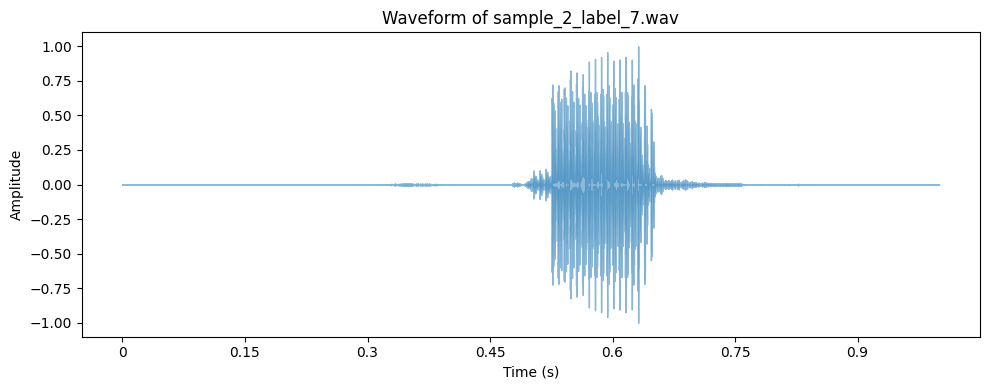

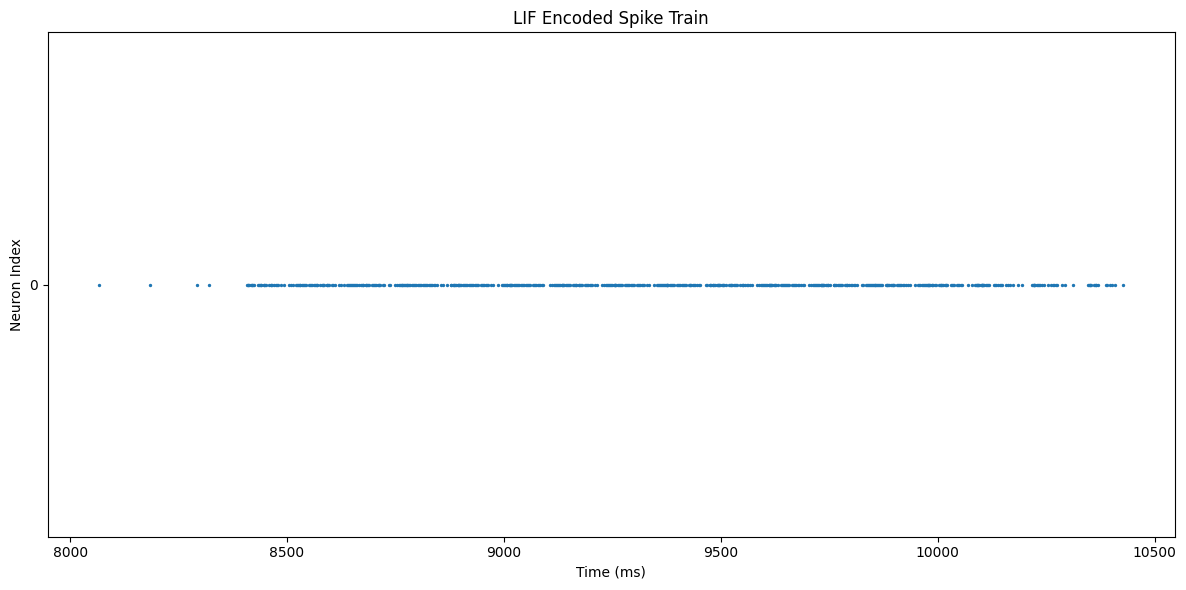

[[0 0 0 ... 0 0 0]]


In [10]:
spike = generator.audio_to_spike_lif(
    filepath="speech_commands_samples/sample_2_label_7.wav",
    resample=False,
    plot=True
)

print(spike)

In [ ]:
bio_spike = generator.audio_to_spike_bio(
    filepath="speech_commands_samples/sample_2_label_7.wav"
)

print(bio_spike)

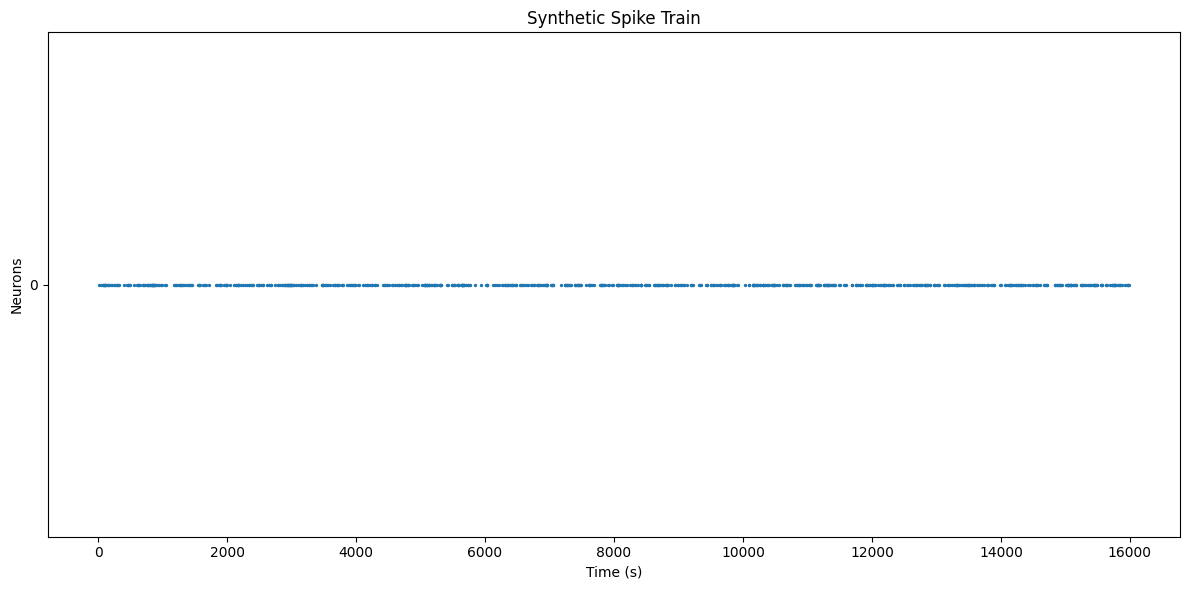

In [15]:
syn_spike_train = generator.generate_homogeneous_poisson_spikes(
    n_neurons=1,
    duration=16,
    rate=50
)

generator.plot_spike_train(
    spike_train=syn_spike_train,
    title="Synthetic Spike Train"
)

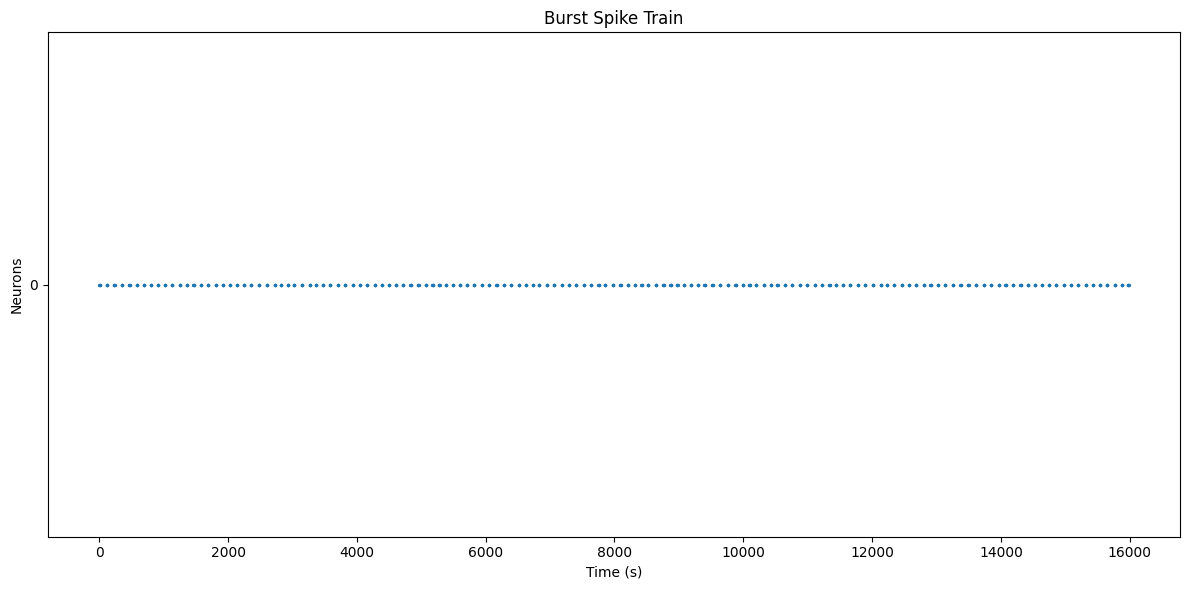

In [5]:
burst_spike_train = generator.generate_burst_spike(
    n_neurons=1,
    duration=16
)

generator.plot_spike_train(
    spike_train=burst_spike_train,
    title="Burst Spike Train"
)

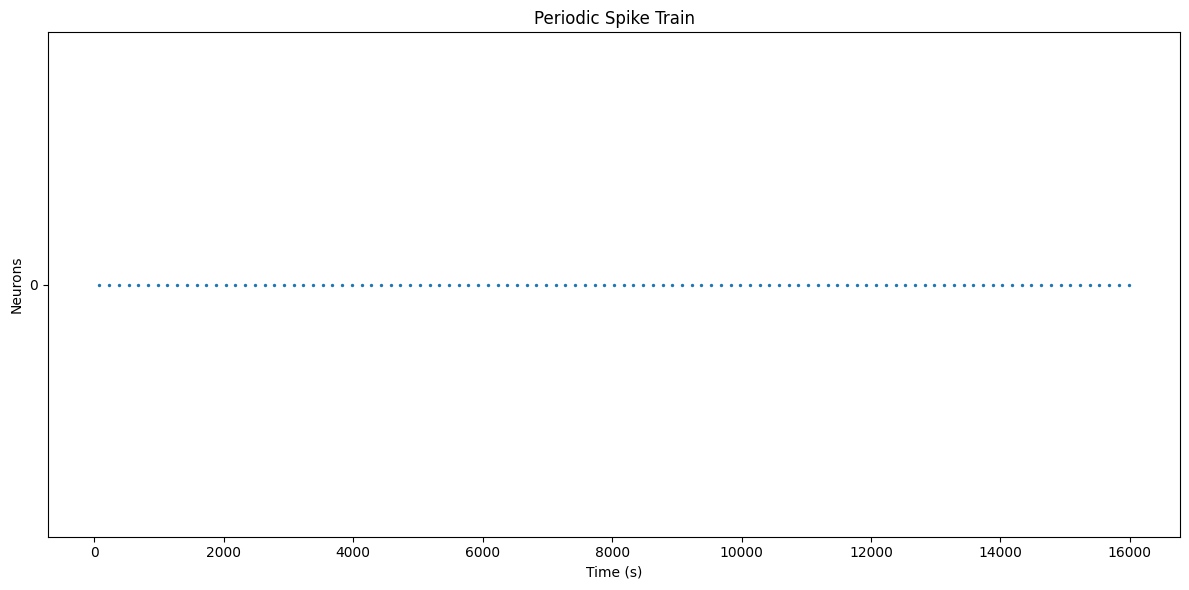

In [7]:
periodic_spike_train = generator.generate_periodic_spikes(
    n_neurons=1,
    intervals=[150],
    duration=16)

generator.plot_spike_train(
    spike_train=periodic_spike_train,
    title="Periodic Spike Train"
)

In [3]:
from snn.snn import SpikingNeuralNetwork

Spikes: 12210


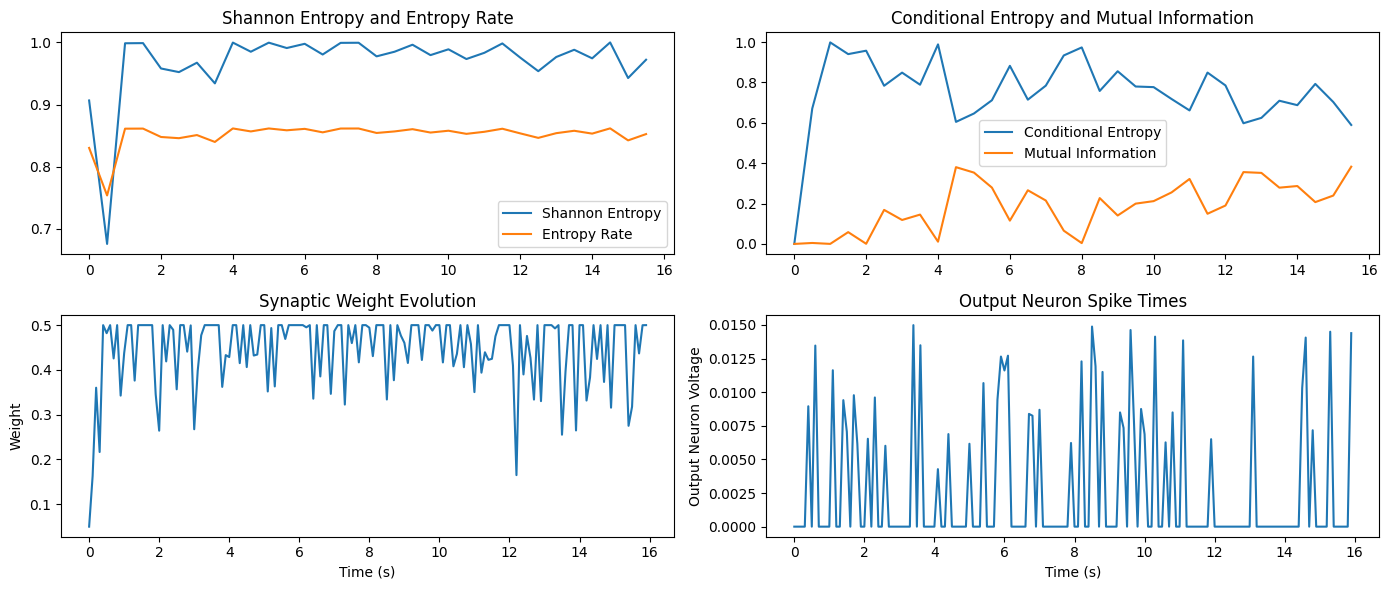

In [17]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=syn_spike_train,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5
)

Spikes: 6908


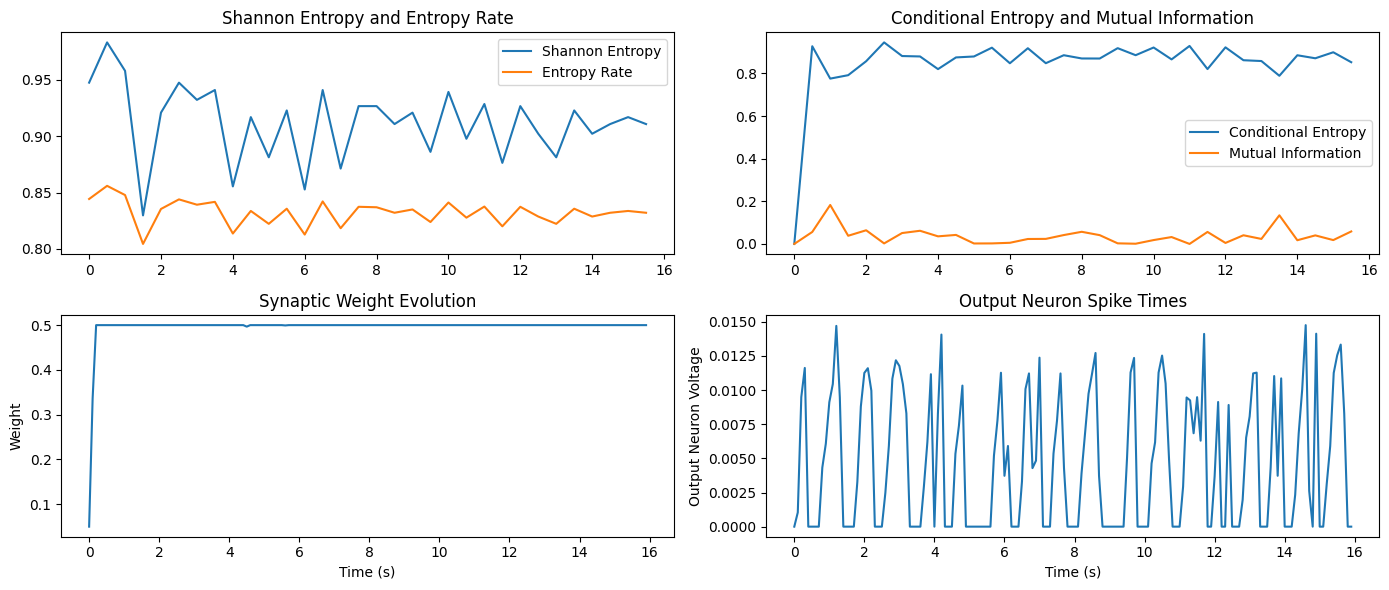

In [13]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=burst_spike_train,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5
)

Spikes: 2640


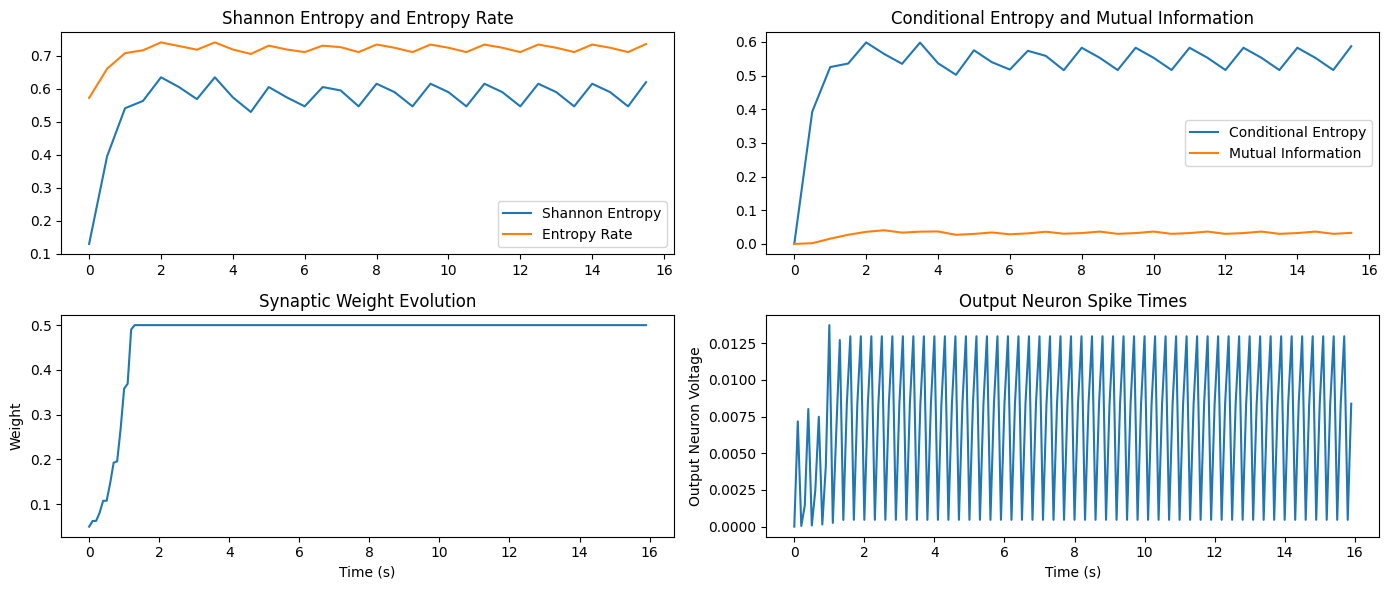

In [9]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=periodic_spike_train,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5
)

Spikes: 2066


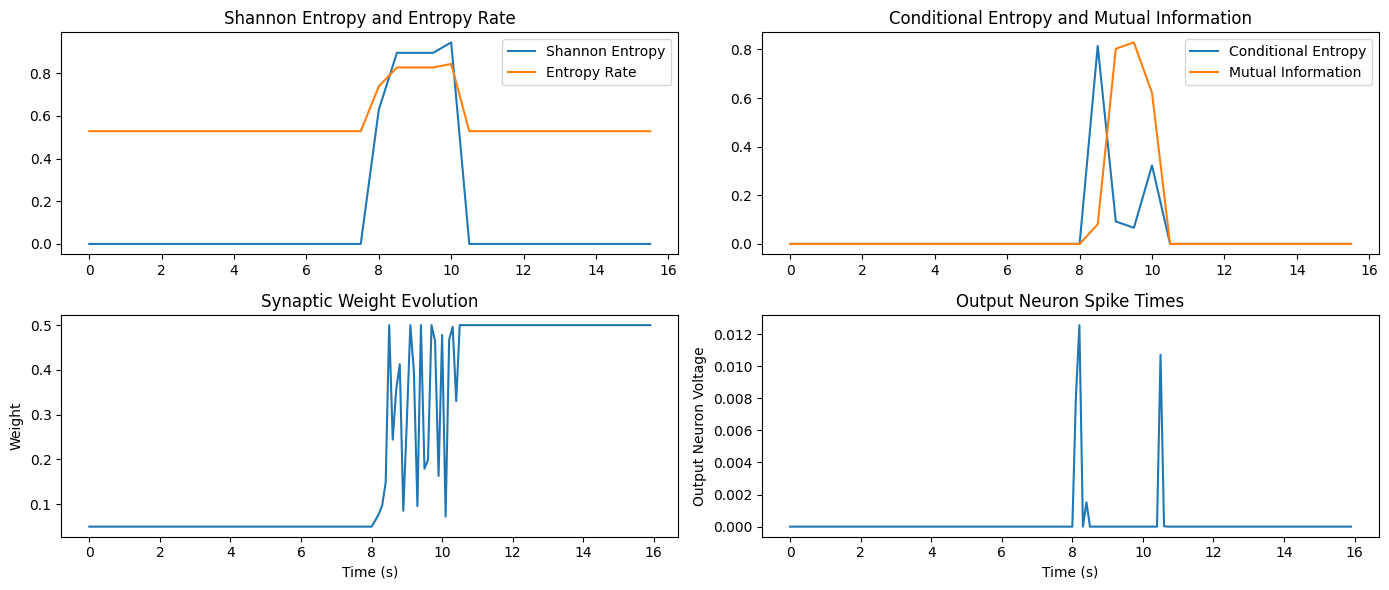

In [12]:
snn = SpikingNeuralNetwork()
results = snn.train_single_stdp(
    spike_train=spike,
    interval=500*ms,
    duration=16000*ms,
    v_threshold=0.015,
    refractory=0*ms,
    gmax=0.5
)